In [1]:
#ARIMA prediction of EU's GDP

In [2]:
#Importing libraries
import pandas as pd
from pandas import DataFrame
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.preprocessing import scale
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
import statsmodels.formula.api as sm
from statsmodels.compat import lzip
import numpy as np
import statsmodels.api as sm
from plotly.plotly import plot_mpl
from plotly.offline import init_notebook_mode, iplot_mpl
from statsmodels.tsa.stattools import adfuller

In [3]:
#Importing dataset
df2=pd.read_csv('WDIData.csv')

In [4]:
#Selecting variables
df2=df2[(df2['Country Name'].str.contains('European Union')==True)]
df2['Indicator Name']=df2['Indicator Name'].str.replace('(',':').str.replace(')',':')
df2=df2[df2['Indicator Name'].str.contains("GDP per capita, PPP :current international")==True]
df2.index=df2['Country Name']
df2=df2.fillna(method='bfill',axis=1)
df2=df2.fillna(method='ffill',axis=1)
df2=df2.iloc[:,34:-2]
ts=df2.mean()
ts=pd.DataFrame(ts)
ts.columns=['GDP per capita']

In [5]:
#Converting data into datetime format and plotting GDP 
X=pd.to_datetime(ts.index)
y=ts['GDP per capita']
layout = go.Layout(title= 'EU GDP per capita PPP current international $',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20))
data = [go.Scatter(x=X,y=y)]
fig =go.Figure(data=data, layout=layout)
iplot(fig, filename='heatmap',show_link=False)

In [6]:
# Plotting LOG of time series
ts_2=ts
ts_2['log_GDP_pc']=np.log(ts['GDP per capita'])
X=ts['log_GDP_pc'].index
y_1=ts['log_GDP_pc']
layout = go.Layout(title= 'EU LOG GDP per capita PPP current international $',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))
trace0 = go.Scatter(x=X,y=y_1, mode = 'lines',name="EU GDP per capita PPP $ growth 1990-2017", marker = dict(size=12, color='blue'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
iplot(fig, filename='heatmap',show_link=False)

In [7]:
#Plotting GDP per capita PPP
ts_1=ts
X=ts['GDP per capita'].index
y_2=ts['GDP per capita'].pct_change().fillna(0)

layout = go.Layout(title= 'EU GDP per capita PPP growth dynamic current international $',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))
trace0 = go.Scatter(x=X,y=y_2, mode = 'lines',name="EU GDP per capita PPP $ growth ", marker = dict(size=12, color='blue'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
iplot(fig, filename='heatmap',show_link=False)

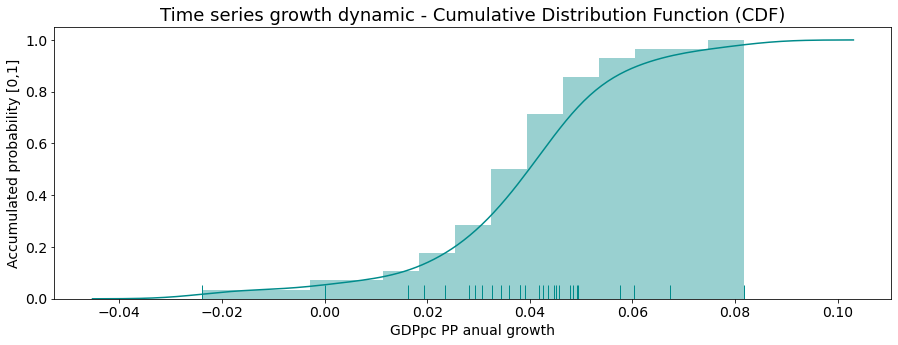

In [10]:
#Growth dynamic of time series
f, ax = plt.subplots(figsize=(15, 5)); plt.title('Distribution')
sns.distplot(ts['GDP per capita'].pct_change().fillna(0),bins=15, hist_kws={'cumulative': True},color='green', 
             kde_kws={'cumulative': True},rug=True)
plt.rc('xtick', labelsize=14)    
plt.rc('ytick', labelsize=14)   
plt.title('Time series growth dynamic - Cumulative Distribution Function (CDF)', 
          size=18)
SIZE2=12
plt.xlabel('GDPpc PP anual growth', size=14)
plt.ylabel('Accumulated probability [0,1]', size=14)
plt.show()

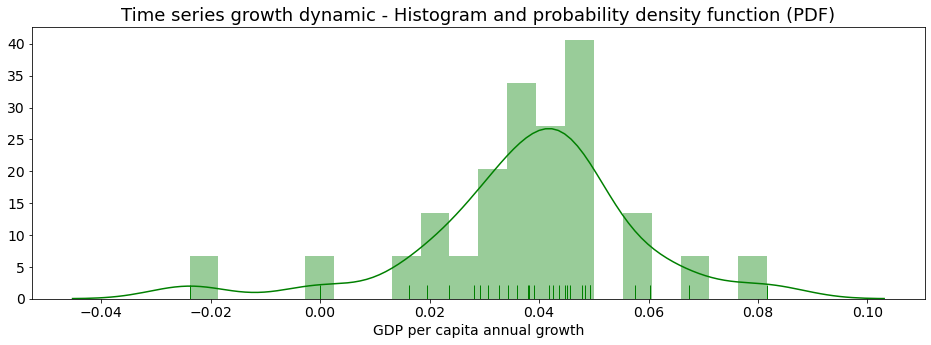

In [11]:
f, ax = plt.subplots(figsize=(16, 5)); plt.title('Distribution')
sns.distplot(ts['GDP per capita'].pct_change().fillna(0),color='green', bins=20,rug=True,hist_kws={"density":True})
plt.rc('xtick', labelsize=SIZE2)    
plt.rc('ytick', labelsize=SIZE2)    
plt.title('Time series growth dynamic - Histogram and probability density function (PDF)', size=18)
plt.xlabel('GDP per capita annual growth', size=14)
plt.show()

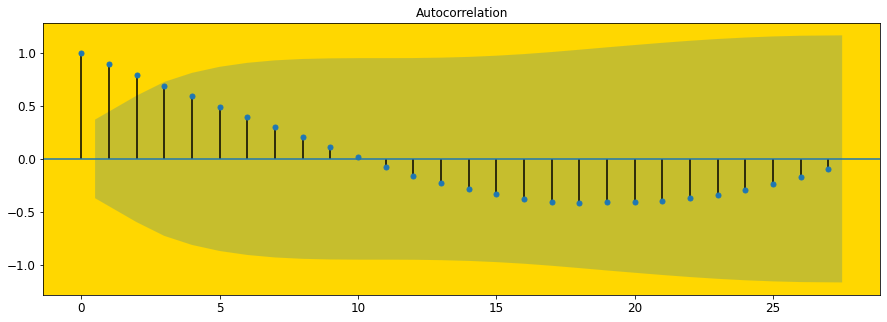

In [12]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor('gold')
sm.graphics.tsa.plot_acf(y,ax=ax,lags=27)
plt.show()

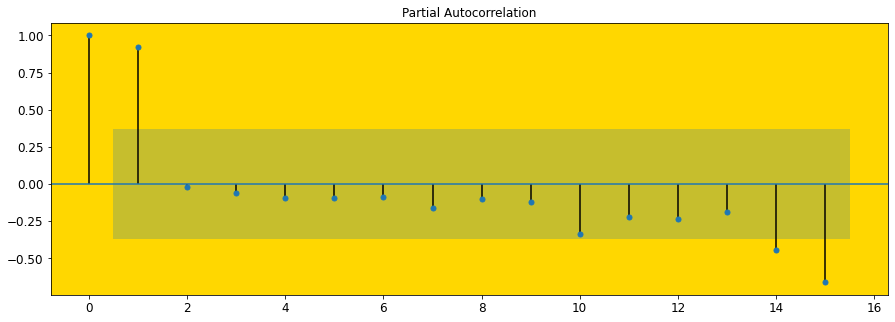

In [13]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor('gold')
sm.graphics.tsa.plot_pacf(y,ax=ax)
plt.show()

In [14]:
#Function for testing stationarity
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.rc('xtick', labelsize=8); plt.rc('ytick', labelsize=16) 
    plt.xticks([])
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

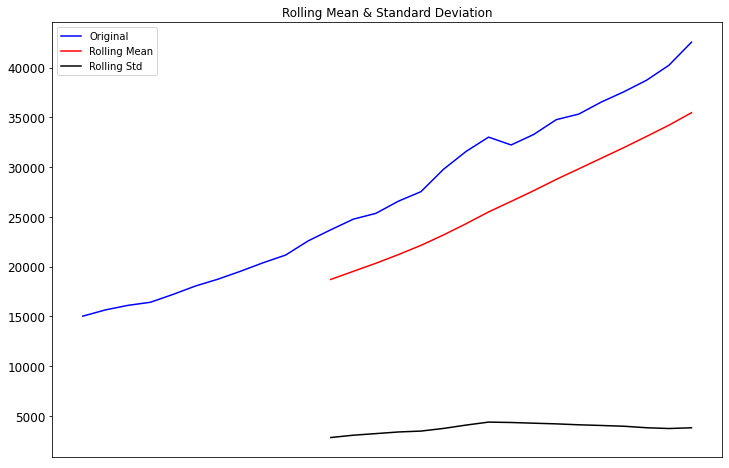

Results of Dickey-Fuller Test:
Test Statistic                  2.020556
p-value                         0.998699
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [15]:
#First test of stationarity
test_stationarity(y)

In [16]:
#Datetime conversion
ts.index = pd.to_datetime(ts.index)
from statsmodels.tsa.seasonal import seasonal_decompose

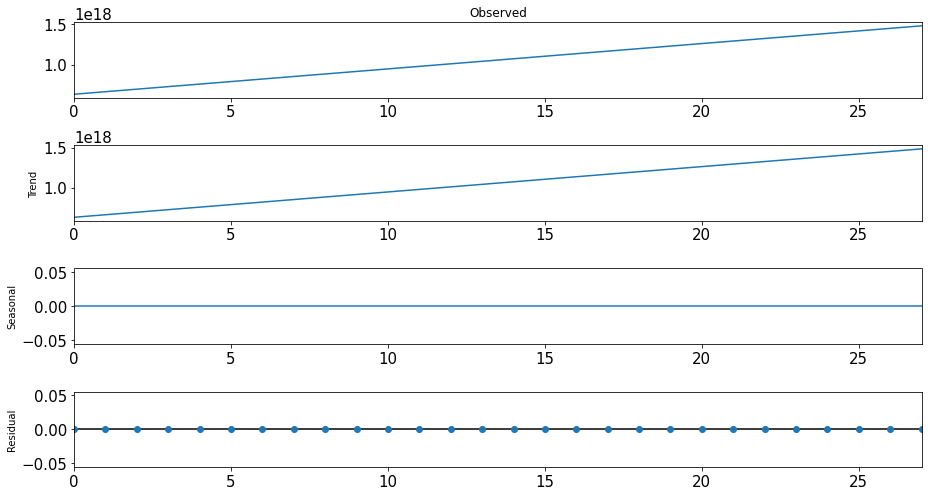

In [17]:
#Spotting trend
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
SIZE2=15  
plt.rc('xtick', labelsize=SIZE2)    # fontsize of the tick X labels 
plt.rc('ytick', labelsize=SIZE2)    # fontsize of the tick Y labels
decomposition = seasonal_decompose(ts.index, model='additive',period=1)
fig = decomposition.plot()
plt.show()

In [18]:
# First order differencing of the time series
y_diff2 = (y).diff().dropna()
y_diff2 = pd.Series(y_diff2 )

In [19]:
#First order differencing
layout = go.Layout(title= 'EU GDP First order differencing',
xaxis = dict(ticks='', nticks=43),
yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))

trace0 = go.Scatter(x=y_diff2.index, y=y_diff2.values, mode = 'lines+markers',name="EU GDPpc PPP $ growth 1990-2017", marker = dict(size=10, color='blue'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
iplot(fig, filename='heatmap',show_link=False)

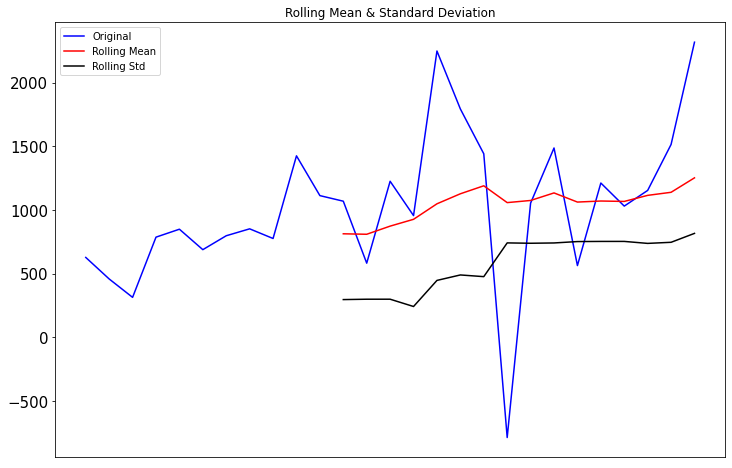

Results of Dickey-Fuller Test:
Test Statistic                 -3.596206
p-value                         0.005834
#Lags Used                      0.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


In [20]:
#Stationarity test confirms stationarity
test_stationarity(y_diff2)

In [21]:
#Fitting and summarising the model
mod = sm.tsa.statespace.SARIMAX(ts['GDP per capita'].values,order=(3,2,3),enforce_stationarity=True,enforce_invertibility=True, maxiter=1000, method='css')
results1 = mod.fit()
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(3, 2, 3)   Log Likelihood                -206.188
Date:                Sun, 13 Dec 2020   AIC                            426.377
Time:                        20:51:51   BIC                            435.183
Sample:                             0   HQIC                           428.913
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0589      0.685     -0.086      0.931      -1.402       1.284
ar.L2         -0.5627      0.310     -1.818      0.069      -1.170       0.044
ar.L3          0.5200      0.482      1.079      0.2

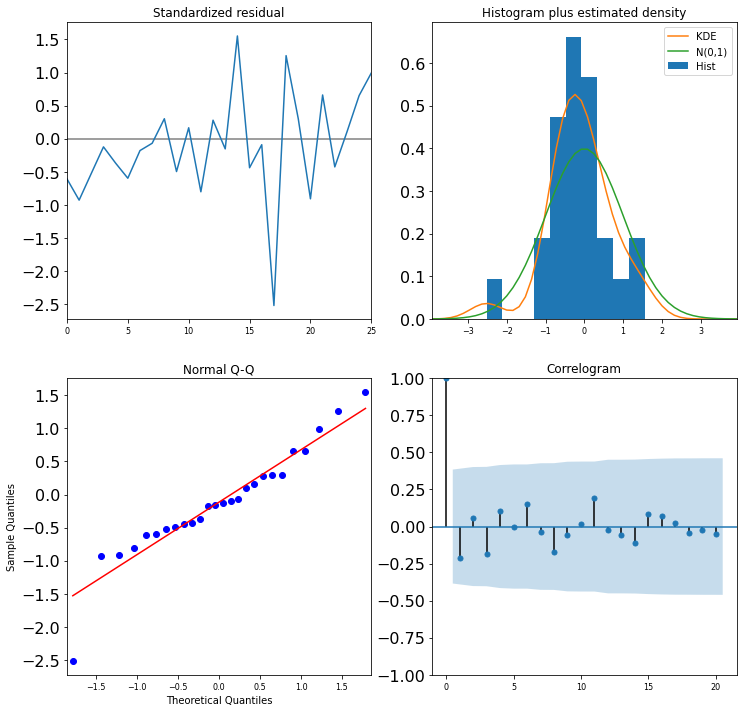

In [22]:
#Plotting results of model
results1.plot_diagnostics(figsize=(12, 12),lags=20)
plt.show()

In [23]:
#Creating forecast
forecast=results1.predict(start=0,end=41)
forecast=pd.DataFrame(forecast, columns = ['projection'])
forecast.index=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017','2018','2019','2020','2021','2022','2023','2024','2025','2026','2027','2028','2029','2030', '2032']

In [24]:
#Table with forecasted data
forecast

,projection
1990,0.000000
1991,23974.310533
1992,16616.920983
1993,17192.138726
1994,17634.648981
1995,18147.156133
1996,19036.168534
1997,20017.946450
1998,20527.157866
1999,21213.028180


In [25]:
# Prediction from 1990 to 2032
trace0 = go.Scatter(
    x = ts.index,
    y = ts['GDP per capita'],
    mode = 'markers',
    name = 'Actual GDP PPP',marker = dict(size=8))
trace1 = go.Scatter(
    x = forecast.iloc[2:].index,
    y = forecast.iloc[2:].projection,
    mode = 'lines+markers',
    name = 'Arima model (5,2,0) in sample model & 2030 projection',marker = dict(size=6),opacity = 0.7)


layout = go.Layout(title= 'In-sample prediction and out-of-sample forecasting to 2030 per capita - EU GDP PPP US$ ',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))
data = [trace0, trace1]
fig =go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter-mode')